In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from src import drawing_functions as df
import plot_functions as pf

colors={}

colors['physics']='#c73b0b'
colors['052012-theoretical-physics']='#c73b0b'

colors['startups']='#e7a136'
colors['122013-answers-onstartups']='#e7a136'

colors['astronomy']='#978e43'
colors['052012astronomy']='#978e43'

colors['math']='#6C9584'
colors['mathematica']='#6C9584'

#colors['startups']='#731115'
#colors['122013-answers-onstartups']='#731115'

folder_path = 'data/processed data/'

communities = ["physics", "astronomy", "052012-theoretical-physics", "052012astronomy", 
               "052012economics", "052012-literature", "literature", "economics", 
               "startups","122013-answers-onstartups", "math", "mathematica"] 

# dictionaries to keep dataframes for all communities:
data_questions = {}
data_rep_agg = {}
data_nets = {}
data_coreper = {}

for comm in communities:
    # active questions data
    # aggragated data about dynamical reputations:
    data_questions[comm] = pd.read_csv(folder_path+'active questions/%s_weekly_active_questions.csv'%(comm))
    data_rep_agg[comm] = pd.read_csv(folder_path+'%s_dynamic_reputation_aggregates.csv'%(comm))
    # interaction networks + dynamical reputations data:
    data_nets[comm] = pd.read_csv(folder_path+'%s_dyn_rep_and_networks_features.csv'%(comm))
    # core periphery data:
    data_coreper[comm] = pd.read_csv(folder_path+'%s_dyn_rep_and_core_periphery_features.csv'%(comm))

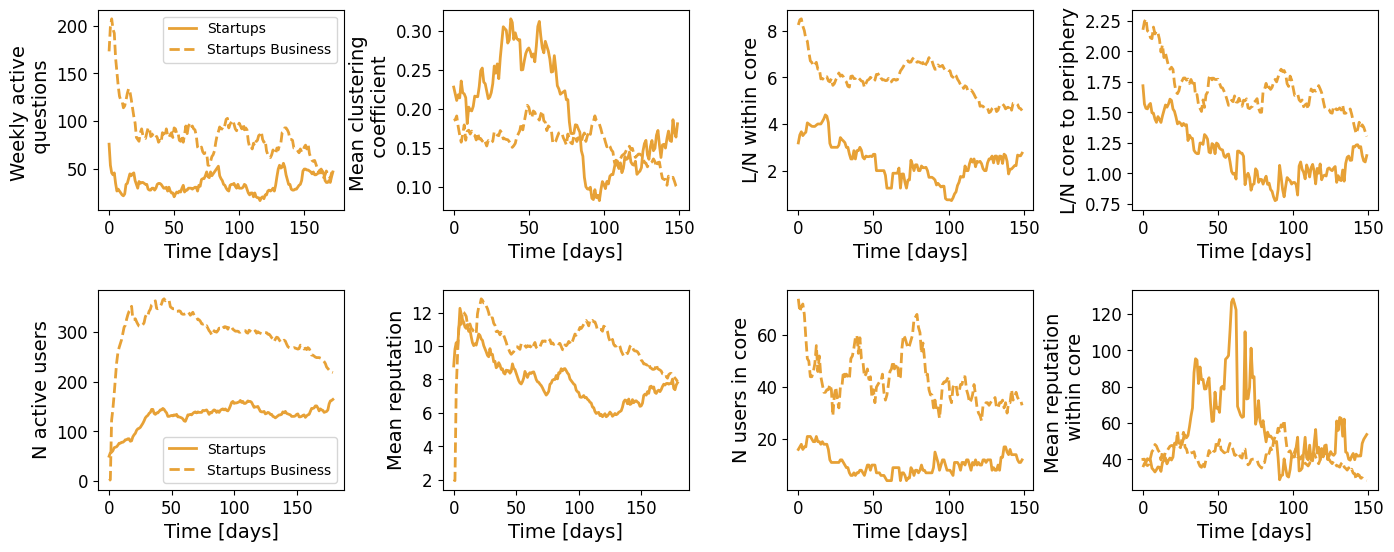

In [2]:
pf.plot_8_variables_2row(data_questions, data_nets, data_coreper, data_rep_agg, "startups", colors, legendtxt=["Startups", "Startups Business"])
#plt.savefig('startups.png', dpi=300, bbox_inches='tight')

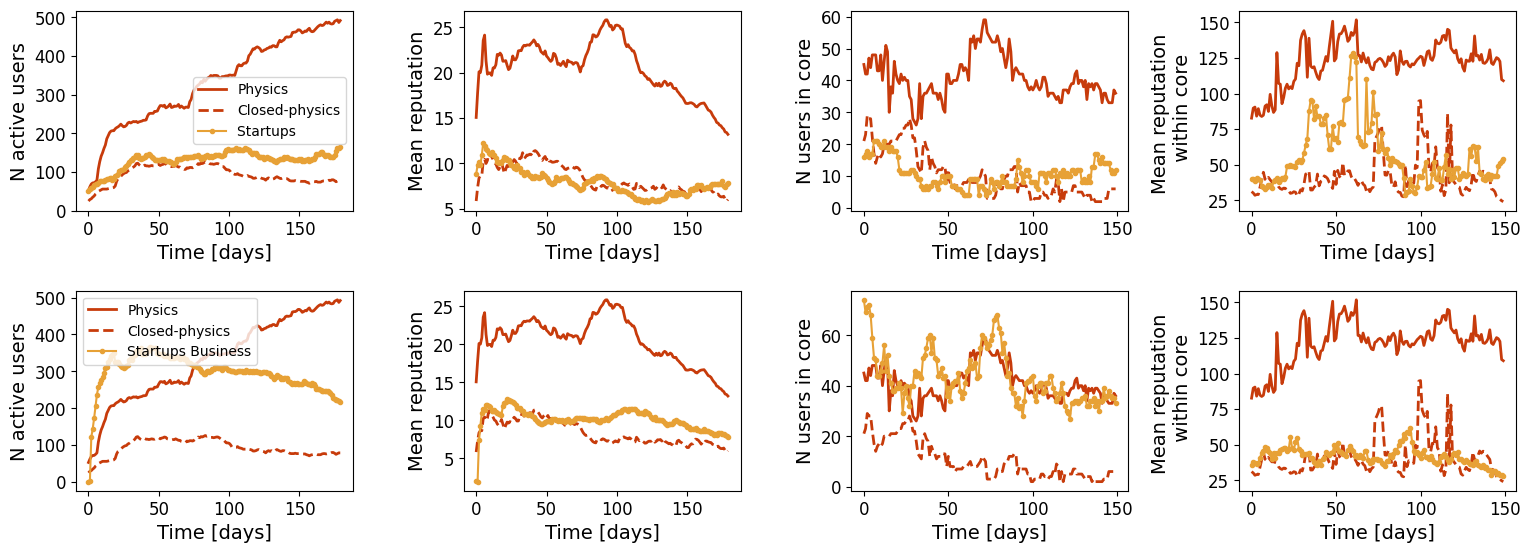

In [3]:
pf.comparestartups_2rows(data_rep_agg, data_coreper, "physics", "startups", "122013-answers-onstartups", colors,  legendtext1=["Physics", "Closed-physics", "Startups "], 
                         legendtext2=["Physics", "Closed-physics", "Startups Business"])
#plt.savefig('startups_physics_rep.png', dpi=300, bbox_inches='tight')

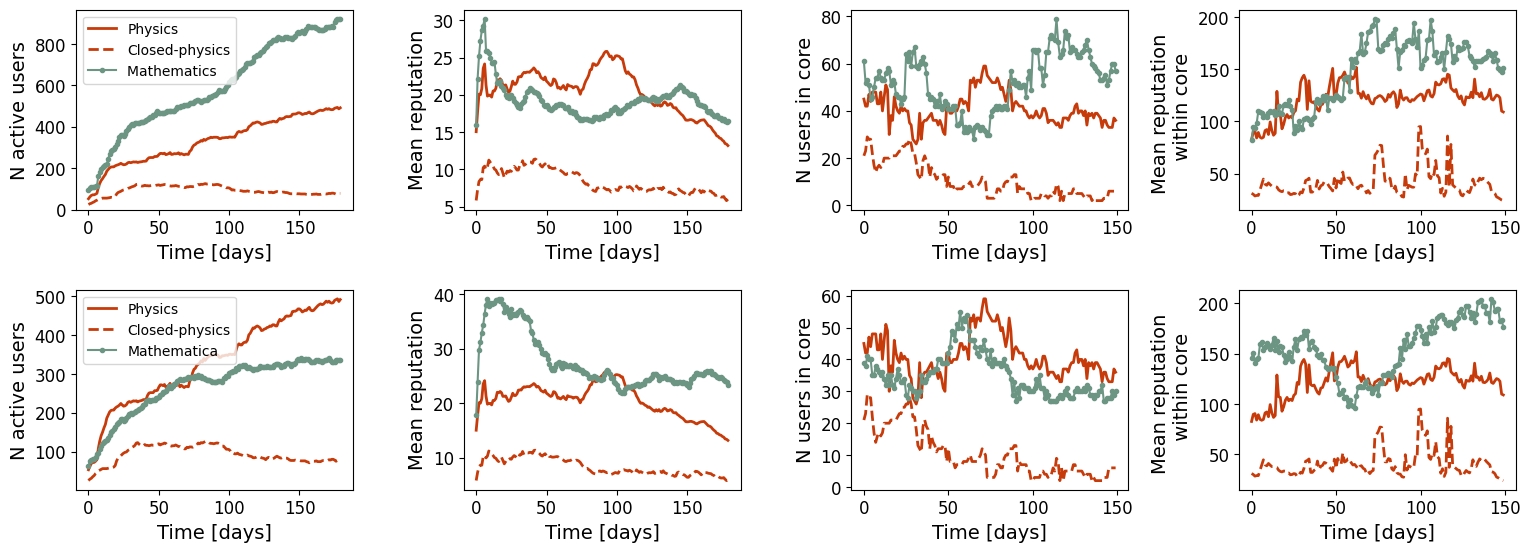

In [4]:
pf.comparestartups_2rows(data_rep_agg, data_coreper, "physics", "math", "mathematica", colors,  legendtext1=["Physics", "Closed-physics", "Mathematics "], 
                         legendtext2=["Physics", "Closed-physics", "Mathematica"])
#plt.savefig('math_physics_rep.png', dpi=300, bbox_inches='tight')

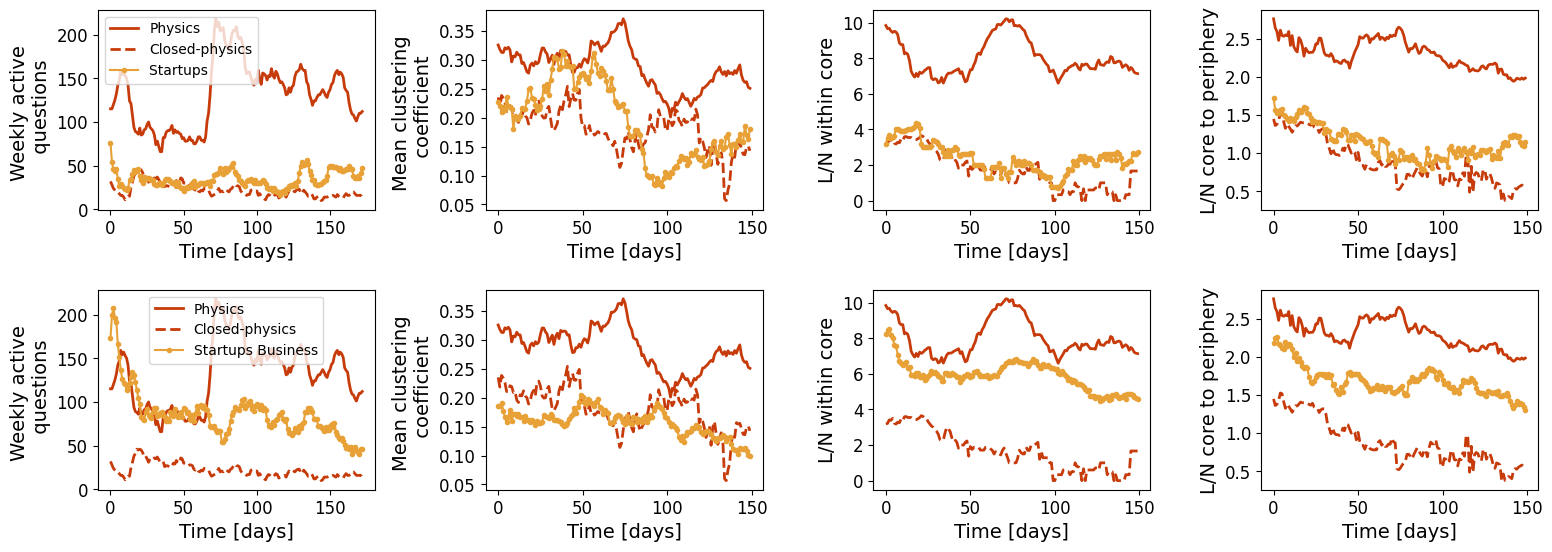

In [5]:
pf.comparestartups_net_2rows(data_questions, data_nets, data_coreper, "physics", "startups", "122013-answers-onstartups", colors,  legendtext1=["Physics", "Closed-physics", "Startups "], 
                         legendtext2=["Physics", "Closed-physics", "Startups Business"])
#plt.savefig('startups_physics_net.png', dpi=300, bbox_inches='tight')